In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.4.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [4]:
import tensorflow as tf
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

Image cleanup

In [6]:
import cv2
import imghdr 

C:\Users\Abilash\AppData\Local\Temp\ipykernel_1048\3006868460.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir='data'

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
image_exts=['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 175 files belonging to 2 classes.


In [13]:
data_iterator=data.as_numpy_iterator()

In [19]:
#get another batch from iterator
batch=data_iterator.next()

In [24]:
#images represented as numpy arrays
batch[0].shape



(32, 256, 256, 3)

In [16]:
batch[1]
#class 1 = sad people
#class 0 = happy people

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

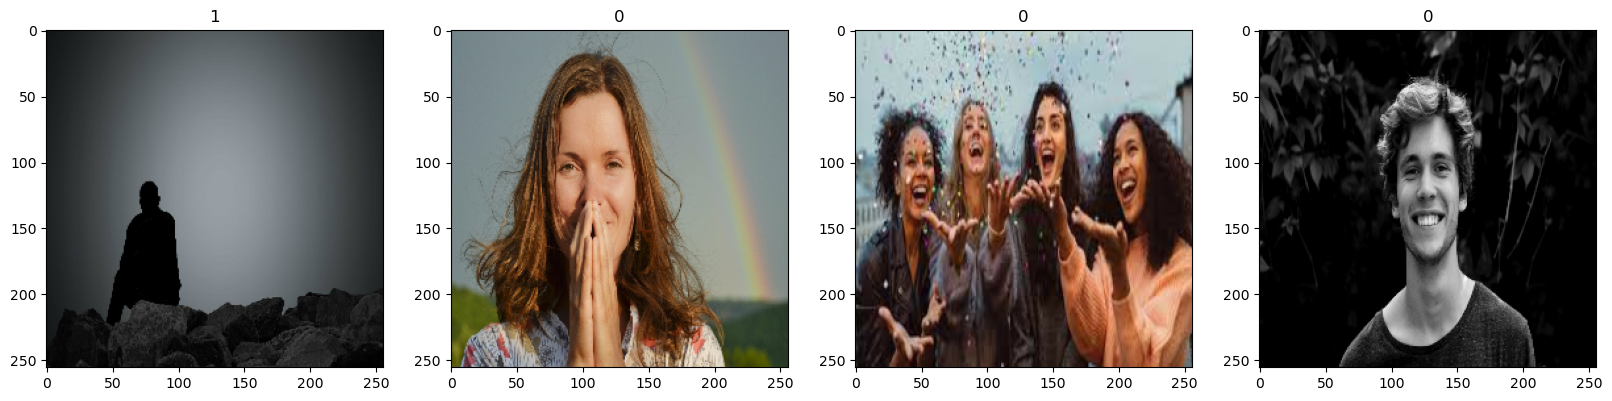

In [20]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
data=data.map(lambda x,y:(x/255,y))

In [27]:
scaled_iterator=data.as_numpy_iterator()

In [28]:
batch=scaled_iterator.next()

In [29]:
batch[0].max()

1.0

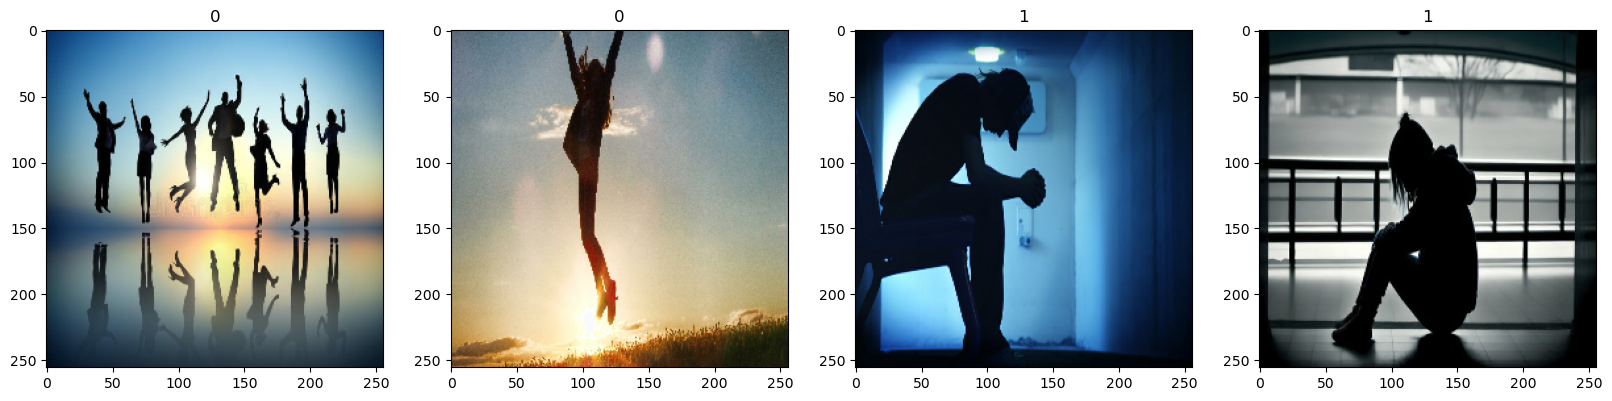

In [30]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [31]:
len(data)

6

In [32]:
train_size=3
val_size=2
test_size=1

In [33]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [37]:
model=Sequential()

In [35]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

TRAIN

In [41]:
logdir='logs'

In [42]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


3/3 [==============================] - 18s 4s/step - loss: 0.6994 - accuracy: 0.6771 - val_loss: 0.6340 - val_accuracy: 0.6719
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 0.6037 - accuracy: 0.6979 - val_loss: 0.5733 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 8s 3s/step - loss: 0.6323 - accuracy: 0.6667 - val_loss: 0.5074 - val_accuracy: 0.7344
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.5096 - accuracy: 0.8125 - val_loss: 0.4285 - val_accuracy: 0.8750
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.4549 - accuracy: 0.8646 - val_loss: 0.4181 - val_accuracy: 0.9062
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.3732 - accuracy: 0.8750 - val_loss: 0.3279 - val_accuracy: 0.9219
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 0.2369 - accuracy: 0.9167 - val_loss: 0.2505 - val_accuracy: 0.9219
Epoch 8/20
3/3 [======================

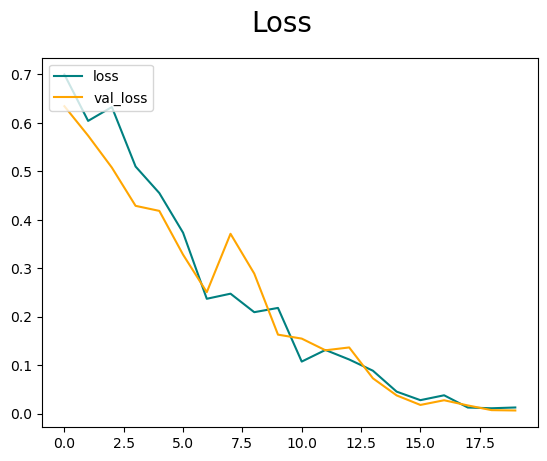

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

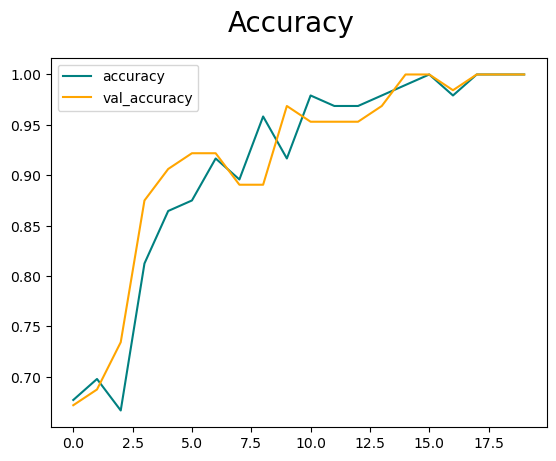

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [48]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [47]:
len(test)

1

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 434ms/step


In [51]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


TEST

In [52]:
import cv2

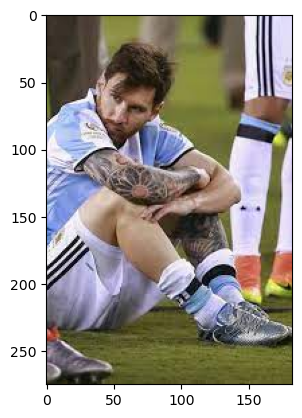

In [68]:
img=cv2.imread('image_classification/sad_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

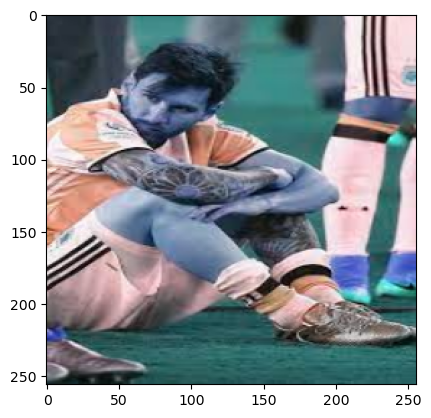

In [69]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
np.expand_dims(resize,0)

array([[[[ 48.96289 ,  57.96289 ,  66.96289 ],
         [ 48.390625,  57.390625,  66.390625],
         [ 47.399326,  56.399326,  65.39932 ],
         ...,
         [249.72354 , 219.72354 , 224.72354 ],
         [250.      , 220.      , 225.      ],
         [250.      , 220.      , 225.      ]],

        [[ 47.777344,  56.777344,  65.77734 ],
         [ 47.268787,  56.268787,  65.26878 ],
         [ 46.601562,  55.601562,  64.60156 ],
         ...,
         [250.      , 220.      , 225.      ],
         [250.04762 , 220.04762 , 225.04762 ],
         [250.11133 , 220.11133 , 225.11133 ]],

        [[ 45.628906,  54.628906,  63.628906],
         [ 45.628906,  54.628906,  63.628906],
         [ 45.39507 ,  54.39507 ,  63.39507 ],
         ...,
         [250.13228 , 220.13228 , 225.13228 ],
         [250.53392 , 220.53392 , 225.53392 ],
         [251.      , 221.      , 226.      ]],

        ...,

        [[ 74.19531 ,  89.26758 ,  94.896484],
         [ 73.581696,  87.72179 ,  93.35069 ]

In [71]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 55ms/step


In [72]:
yhat

array([[0.00418554]], dtype=float32)